# Mask

In this notebook, we will be creating and applying a mask to the part of the SN1 filter of M33 field 7.

Let's start with importing `LUCI`. Just as described on the *readthedocs* page, we need to point our system path to our install location of the **LUCI** folder.

In [1]:
# Imports
import sys
sys.path.insert(0, '/home/carterrhea/Documents/LUCI/')  # Location of Luci
from LuciBase import Luci
import LUCI.LuciPlotting as lplt
import matplotlib.pyplot as plt
import numpy as np

2022-09-08 17:11:43.486281: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-08 17:11:43.486302: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


We now will set the required parameters. We are also going to be using our machine learning algorithm to get the initial guesses.

In [2]:
#Set Parameters
# Using Machine Learning Algorithm for Initial Guess
Luci_path = '/home/carterrhea/Documents/LUCI/'
cube_dir = '/mnt/carterrhea/carterrhea/M33/SN1'  # Path to data cube
cube_name = 'SN1_Field7'  # don't add .hdf5 extension
object_name = 'M33_Field7'
redshift = -0.0006  # Redshift of M33
resolution = 1000

We intialize our LUCI object

In [3]:
# Create Luci object
cube = Luci(Luci_path, cube_dir+'/'+cube_name, cube_dir, object_name, redshift, resolution)

Reading in data...


100%|█████████████████████████████████████████████| 9/9 [00:06<00:00,  1.46it/s]


2022-09-08 17:11:53.245049: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-08 17:11:53.245092: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-08 17:11:53.245111: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2022-09-08 17:11:53.245300: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Let's quickly create a deep frame

# Make Mask
Now we will examine the deep image, choose a region to make a mask out of, and make the mask in numpy. Please note that you can make a mask any way you would like! Just be sure that the mask that you pass to `LUCI` for fitting is a numpy boolean array.

In [4]:
# Create Deep Image
cube.create_deep_image()

Existing deep frame extracted from hdf5 file.


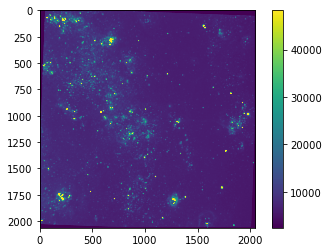

In [5]:
plt.imshow(cube.deep_image)
plt.clim(1e-4*np.max(cube.deep_image), 2e-3*np.max(cube.deep_image))
plt.colorbar()

We are going to mask out the regions where the deep image value is less than 1e4

In [6]:
mask = np.ma.masked_where(cube.deep_image > 1e4, cube.deep_image).mask

Let us visualize the mask. The regions that are yellow are unmasked regions.

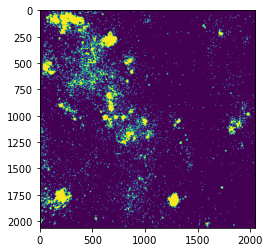

In [7]:
plt.imshow(mask)

## Fitting

Now we will use are mask in a fit!

Let's extract a background region and take a look at it. The background region is defined in a ds9 region file.

100%|█████████████████████████████████████| 2064/2064 [00:00<00:00, 3121.33it/s]


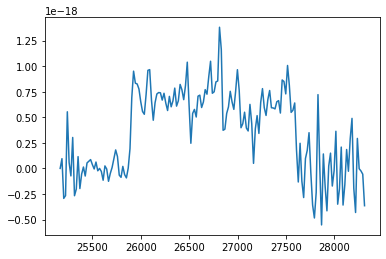

In [8]:
bkg_axis, bkg_sky = cube.extract_spectrum_region(cube_dir+'/bkg.reg', mean=True)  # We use mean=True to take the mean of the emission in the region instead of the sum
plt.plot(bkg_axis, bkg_sky)

In [9]:
# Fit!
vel_map, broad_map, flux_map, chi2_fits, mask = cube.fit_region(['OII3726', 'OII3729'], 'sincgauss', [1, 1], [1, 1], mask, bkg=bkg_sky, binning=1)

 99%|████████████████████████████████████▋| 2048/2064 [2:17:07<01:04,  4.02s/it]


IndexError: index 2048 is out of bounds for axis 1 with size 2048

Let's take a look at the flux map.

In [ ]:
lplt.plot_map(flux_map[:,:,0], 'flux', cube_dir, cube.header, clims=[-16, -9])